In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from category_encoders import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted

In [2]:
def wrangle(filepath):
    data= pd.read_csv(filepath)

    return data

In [3]:
df= wrangle("cleaned_merged_heart_dataset.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1888 non-null   int64  
 1   sex       1888 non-null   int64  
 2   cp        1888 non-null   int64  
 3   trestbps  1888 non-null   int64  
 4   chol      1888 non-null   int64  
 5   fbs       1888 non-null   int64  
 6   restecg   1888 non-null   int64  
 7   thalachh  1888 non-null   int64  
 8   exang     1888 non-null   int64  
 9   oldpeak   1888 non-null   float64
 10  slope     1888 non-null   int64  
 11  ca        1888 non-null   int64  
 12  thal      1888 non-null   int64  
 13  target    1888 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 206.6 KB


In [5]:
df.select_dtypes('number').drop(columns= 'target').corr()
#conclusion, no multi-collinearity present

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal
age,1.000000,-0.104266,-0.036207,0.271607,0.221379,0.119464,-0.059987,-0.392916,0.092343,0.205371,-0.121312,0.283840,0.053396
sex,-0.104266,1.000000,-0.032933,-0.068685,-0.198892,0.032837,-0.031690,-0.053983,0.145680,0.092515,-0.020484,0.104863,0.168063
cp,-0.036207,-0.032933,1.000000,0.025887,-0.037596,0.052189,0.200863,0.171463,-0.231718,-0.094668,0.164810,-0.110988,0.392841
trestbps,0.271607,-0.068685,0.025887,1.000000,0.136976,0.171784,-0.056821,-0.041222,0.067186,0.196181,-0.084387,0.098762,0.054935
chol,0.221379,-0.198892,-0.037596,0.136976,1.000000,0.024681,-0.062365,-0.021208,0.073496,0.058111,-0.009180,0.080456,0.063576
fbs,0.119464,0.032837,0.052189,0.171784,0.024681,1.000000,-0.054344,-0.000829,0.035332,0.000702,-0.045836,0.132365,-0.004210
restecg,-0.059987,-0.031690,0.200863,-0.056821,-0.062365,-0.054344,1.000000,0.021038,-0.029963,-0.016102,0.131779,-0.038458,0.174936
thalachh,-0.392916,-0.053983,0.171463,-0.041222,-0.021208,-0.000829,0.021038,1.000000,-0.381478,-0.349612,0.277653,-0.215914,-0.100009
exang,0.092343,0.145680,-0.231718,0.067186,0.073496,0.035332,-0.029963,-0.381478,1.000000,0.299862,-0.188768,0.117558,0.158651
oldpeak,0.205371,0.092515,-0.094668,0.196181,0.058111,0.000702,-0.016102,-0.349612,0.299862,1.000000,-0.408819,0.221370,0.160869


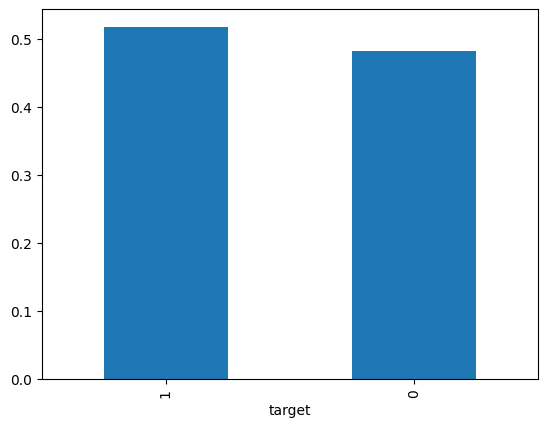

In [6]:
#balance of our classes
df['target'].value_counts(normalize= True).plot(kind='bar');

In [7]:
age_pivot= pd.pivot_table(df, index= 'sex', values= 'target', aggfunc= 'mean').sort_values(by= 'sex')
age_pivot

,target
sex,
0,0.663265
1,0.451538


In [12]:
df.select_dtypes('object').nunique()
#no cardinality features

Series([], dtype: float64)

In [13]:
X= df.drop(columns= 'target')
y=df['target']
print(X.shape)
print(y.shape)

(1888, 13)
(1888,)


In [15]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state= 42)

In [16]:
acc_baseline= y_train.value_counts(normalize= True).max()
print("Baseline accuracy score is: ", acc_baseline)

Baseline accuracy score is:  0.5211920529801325


In [24]:
model= LogisticRegression(max_iter= 1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [25]:
#evaluation
acc_train= accuracy_score(y_train, model.predict(X_train))
acc_test= model.score(X_test, y_test)
print("Training accuracy: ", round(acc_train, 2))
print("Test accuracy: ", round(acc_test, 2))

Training accuracy:  0.76
Test accuracy:  0.72


In [32]:
importances= model.coef_[0]

In [33]:
odds_ratios= pd.Series(importances, index= X_train.columns).sort_values()
odds_ratios.head()

sex       -0.880856
exang     -0.684283
ca        -0.451433
thal      -0.202689
oldpeak   -0.191388
dtype: float64

<Axes: >

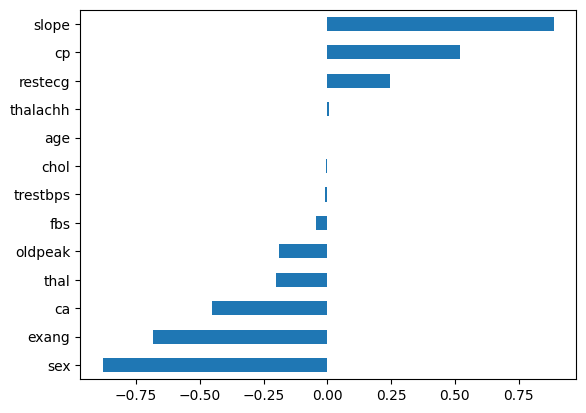

In [35]:
odds_ratios.plot(kind="barh")

In [36]:
model.predict_proba(X_train)

array([[0.73231621, 0.26768379],
       [0.27106506, 0.72893494],
       [0.42406027, 0.57593973],
       ...,
       [0.30074593, 0.69925407],
       [0.18843845, 0.81156155],
       [0.38906197, 0.61093803]], shape=(1510, 2))